In [1]:
from fastai.tabular import *

In [2]:
pwd

'D:\\python\\projects'

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(1460, 80)

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [7]:
cat_names = ['MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour','Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating','Fireplaces', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',  'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

# cont_names = ['LotFrontage', 'SalePrice']
cont_names = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',        'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']

In [8]:
procs = [FillMissing, Categorify, Normalize]

In [9]:
dep_var = 'SalePrice'

In [10]:
TabularList.from_df?

In [11]:
pwd

'D:\\python\\projects'

In [31]:
path="D:\\python\\projects"

In [53]:
testDf = pd.read_csv('test.csv')
testDf = testDf.drop('Id',axis=1)

In [54]:
test = TabularList.from_df(testDf, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [55]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(valid_pct = 0.2)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [56]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,Heating,Fireplaces,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,BsmtFinSF1_na,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target
20,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,No,GLQ,Unf,0,GasA,1,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,False,1.2466,0.0818,1.3729,-0.4979,1.1732,1.1318,0.5278,1.6623,-0.1820,1.4310,1.3685,-0.7714,-0.1155,0.3697,1.0904,-0.2227,0.7927,-0.7568,0.1909,-0.2170,0.3097,1.2295,1.6375,1.3875,-0.7442,0.0586,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,-0.5069,1.6711,306000.0
60,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,ALQ,Unf,0,GasA,1,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,False,0.2169,0.0750,0.6551,-0.4979,0.8768,0.6958,0.5388,-0.4212,0.7562,0.2071,-0.0413,1.2569,-0.1155,0.9874,-0.8190,-0.2227,0.7927,1.2476,0.1909,-0.2170,0.9157,0.8124,0.3121,0.3159,0.8029,0.5817,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,0.2350,0.1580,222500.0
20,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,0,GasA,0,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,New,Partial,False,False,False,False,1.0228,0.1326,1.3729,-0.4979,1.1732,1.0834,0.8250,-0.9647,2.5490,1.4088,1.3429,-0.7714,-0.1155,0.3508,-0.8190,-0.2227,0.7927,-0.7568,0.1909,-0.2170,0.3097,1.1878,1.6375,1.6009,0.6095,2.7971,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,2.0897,-0.5985,318000.0
60,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,0,GasA,0,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,False,0.6646,0.3315,1.3729,-0.4979,1.0086,0.8411,-0.5730,-0.9647,0.9054,-0.2061,-0.4506,1.3424,-0.1155,0.7550,-0.8190,-0.2227,0.7927,1.2476,1.4024,-0.2170,1.5217,0.9793,0.3121,-0.1943,0.3436,-0.7107,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,-0.8778,1.6711,202900.0
190,RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2fmCon,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,BLQ,Unf,0,GasA,2,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,False,0.8885,0.4750,-0.7805,-0.4979,-0.6052,-1.5331,-0.2648,0.8492,-0.5483,0.2337,0.4270,-0.7714,-0.1155,-0.3254,1.0904,-0.2227,-1.0192,-0.7568,-1.0207,-0.2170,-0.9022,-1.0645,-1.0134,-0.4541,-0.7442,-0.7107,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,-0.1359,-1.3550,157000.0
120,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,CompShg,WdShing,Wd Shng,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,0,GasA,1,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,New,Partial,False,False,False,False,-0.7680,-0.6135,0.6551,-0.4979,1.1403,1.0834,-0.1767,-0.9647,1.5633,0.4403,0.2274,-0.7714,-0.1155,-0.4728,-0.8190,-0.2227,0.7927,-0.7568,-1.0207,-0.2170,-0.2963,1.1878,1.6375,0.8123,0.4161,-0.4645,-0.3642,-0.1174,-0.2686,-0.0583,-0.0821,-0.1359,-0.5985,172500.0
60,RL,Pave,#na#,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,

In [57]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)

In [58]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,mean_squared_error,time
0,38454759424.000000,39784558592.000000,39784558592.000000,00:33


In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


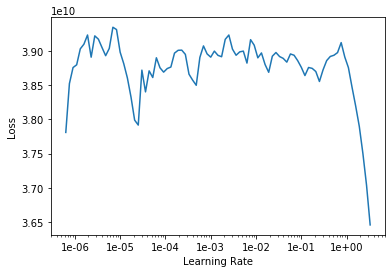

In [60]:
learn.recorder.plot()

In [61]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(8, max_lr=slice(1))

epoch,train_loss,valid_loss,mean_squared_error,time
0,38928265216.000000,40127021056.000000,40127021056.000000,00:32
1,36535541760.000000,30608543744.000000,30608543744.000000,00:32
2,25556934656.000000,11353831424.000000,11353831424.000000,00:31
3,16017620992.000000,697410304.000000,697410304.000000,00:33
4,10600801280.000000,1344547712.000000,1344547712.000000,00:32
5,7287837184.000000,1656420992.000000,1656420992.000000,00:32
6,5127537664.000000,1007617792.000000,1007617792.000000,00:32
7,3729403136.000000,792713984.000000,792713984.000000,00:32


In [63]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [64]:
preds

tensor([[116488.9375],
        [148379.1875],
        [163991.6719],
        ...,
        [149667.2812],
        [106791.6562],
        [196611.8750]])

In [65]:
result = preds.numpy()[:, 0]
result

array([116488.94 , 148379.19 , 163991.67 , 179681.6  , ...,  74694.664, 149667.28 , 106791.66 , 196611.88 ],
      dtype=float32)

In [66]:
ids = [i for i in range(1461,2920)]

In [67]:
d = {'Id': ids, 'SalePrice':result}
df2 = DataFrame(data=d)

In [68]:
df2

,Id,SalePrice
0,1461,116488.937500
1,1462,148379.187500
2,1463,163991.671875
3,1464,179681.593750
4,1465,181262.062500
5,1466,152568.203125
6,1467,162908.093750
7,1468,149027.234375
8,1469,169962.500000
9,1470,119869.390625


In [69]:
df2.to_csv('out.csv', index=False)